# ***𝟱-𝗗𝗮𝘆 𝗠𝗮𝗰𝗵𝗶𝗻𝗲 𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴 𝗥𝗲𝘃𝗶𝘀𝗶𝗼𝗻 𝗖𝗵𝗮𝗹𝗹𝗲𝗻𝗴𝗲***

# 𝗗𝗮𝘆 𝟮: 𝗗𝗲𝗰𝗶𝘀𝗶𝗼𝗻 𝗧𝗿𝗲𝗲𝘀
🔍 **Algorithm:**
Splits data based on feature values, creating a tree of decisions.

🛠️ **Project:**
 Classify Iris Species / OR use any other dataset

📊 **Tasks:**

• Load and preprocess the dataset.
• Visualize feature distributions.
• Implement and train a Decision Tree classifier.
• Visualize the tree and evaluate accuracy.


## 1. Load and Preprocess the Dataset


In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Create a DataFrame with the data and feature names
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the target column
iris_df['species'] = iris.target


In [36]:
# Display the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
iris_df.shape

(150, 5)

In [38]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 2. Visualize Feature Distributions
To visualize the distributions of the features, you can use seaborn and matplotlib. Here's how to plot histograms for each feature:

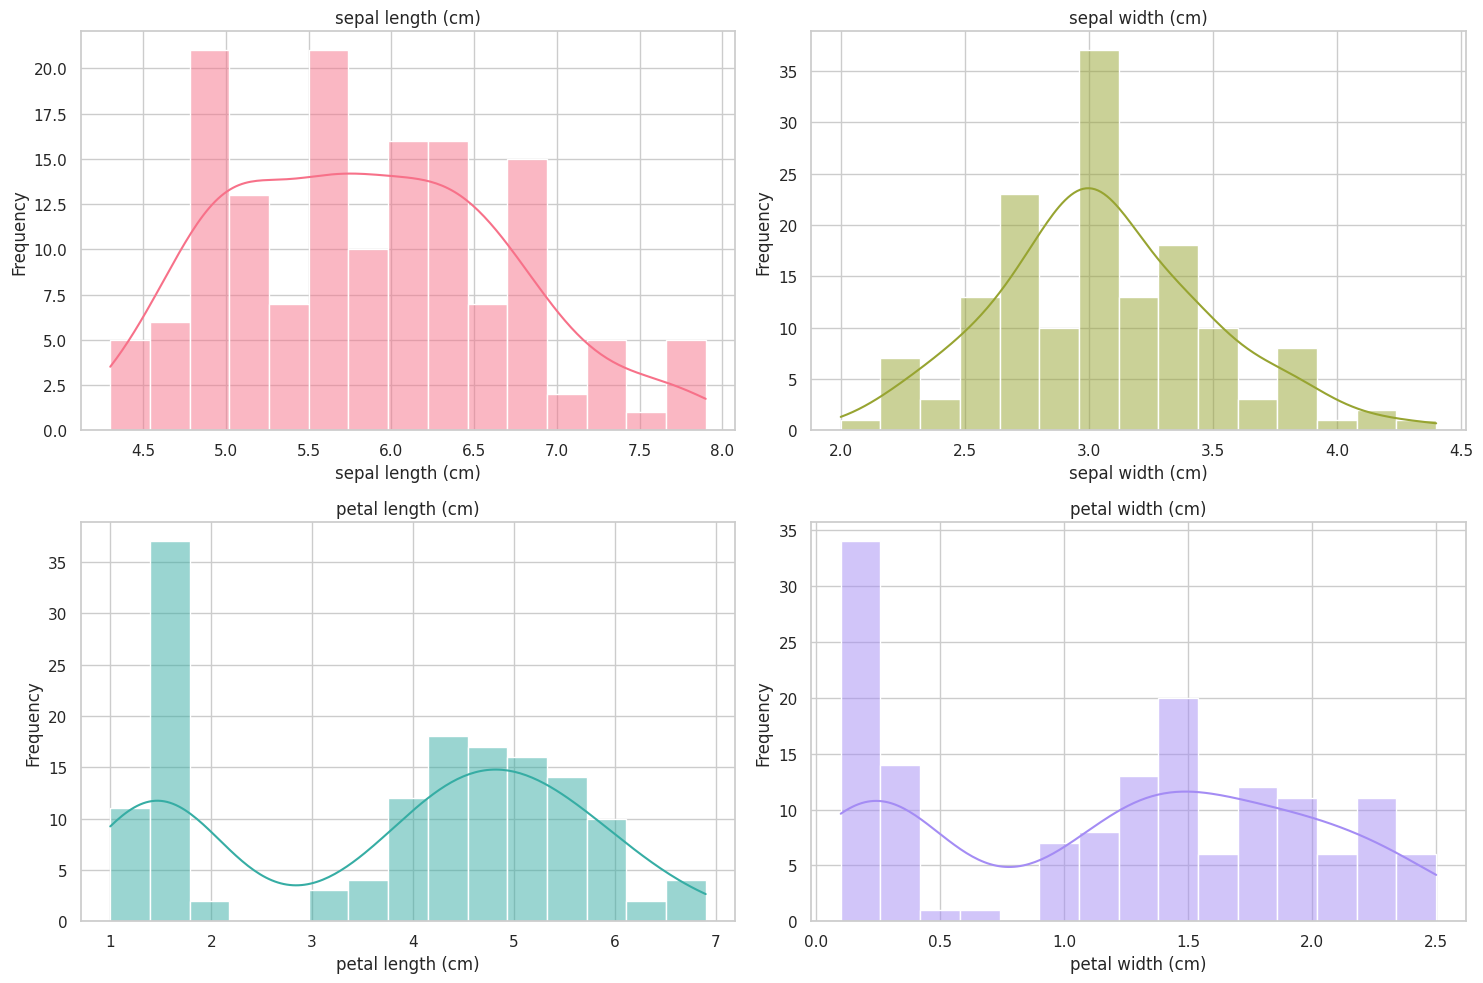

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots and a color palette
sns.set(style="whitegrid", palette="bright")

# Define a color palette
colors = sns.color_palette("husl", len(iris.feature_names))

# Plot the distribution of each feature with customized colors
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, idx + 1)
    sns.histplot(iris_df[feature], kde=True, color=colors[idx], bins=15)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 3. Implement and Train a Decision Tree Classifier
Here's how you can implement and train a Decision Tree model using scikit-learn:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


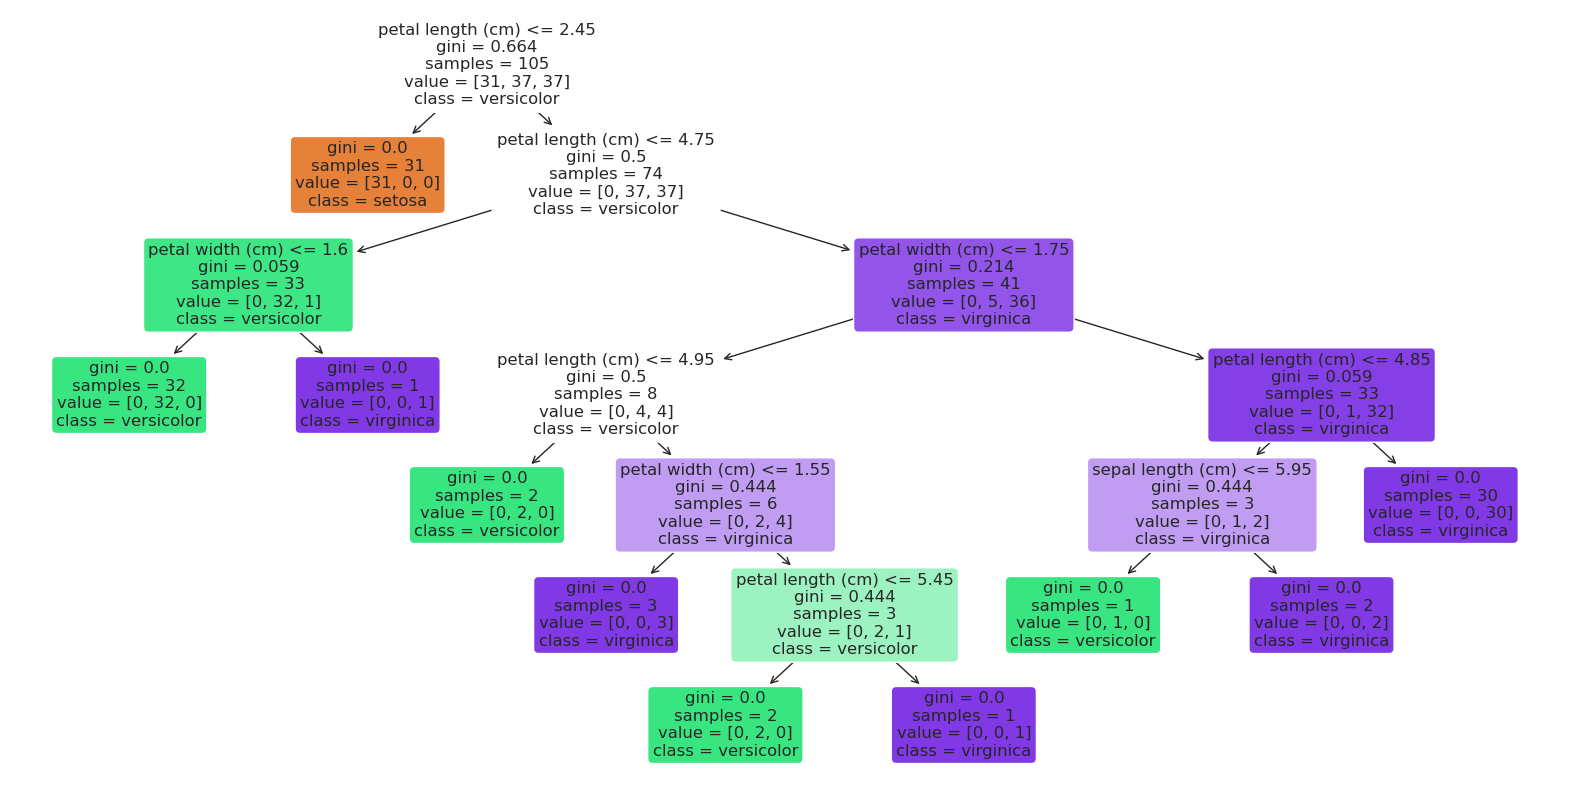

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()


# ***Just Practice of Ensemble Models of ML***

I already know that the accuracy will be 100 % because Ensemble models are more robust... Just doing it for learning

## Using Ensemble Models
Let's go over how to implement some common ensemble models using the scikit-learn library.

### 1. Bagging with Random Forest
Random Forest is an ensemble of Decision Trees. Here's how ywe can use it:

***Bagging (Bootstrap Aggregating):***

This technique involves training multiple models independently on different random subsets of the training data and then averaging their predictions.
Example: Random Forest, which is an ensemble of Decision Trees.


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%


## 2. Boosting with AdaBoost
AdaBoost trains models sequentially, with each new model focusing on the mistakes of the previous ones.

***Boosting:***

In boosting, models are trained sequentially, with each model trying to correct the errors of its predecessor. The predictions are combined using a weighted sum.
Example: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the AdaBoost classifier with Decision Tree as base learner
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'AdaBoost Accuracy: {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 100.00%


## 3. Stacking
In stacking, you use multiple models as base learners and another model as a meta-learner to combine their predictions

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Initialize the Stacking Classifier with Logistic Regression as the meta-learner
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy * 100:.2f}%')


Stacking Classifier Accuracy: 100.00%


## Conclusion
Ensemble models are powerful tools for improving model performance and generalization. Each ensemble method has its strengths and can be chosen based on the specific requirements and nature of the data.

**Day 02 Completed**

# ***Load the Titanic dataset***

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
titanic_df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')


In [47]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


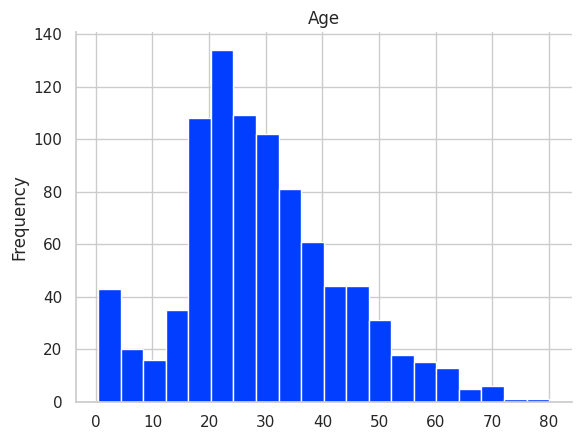

In [52]:
# @title Age

from matplotlib import pyplot as plt
titanic_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [54]:
# Drop unnecessary columns and handle missing values
titanic_df.drop(['Name'], axis=1, inplace=True)

In [56]:
imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])

In [58]:
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


In [59]:
# Encode categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])

In [67]:
Original_classes = label_encoder.classes_


In [70]:
Original_classes


array(['female', 'male'], dtype=object)

In [71]:
titanic_df['Sex'].value_counts()

,count
Sex,
1,573
0,314


In [89]:
# Define features and target
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [97]:
y.value_counts()

,count
Survived,
0,545
1,342


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 78.28%


### Bagging with Random Forest

In [91]:
|from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 77.90%


### AdaBoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost classifier with Decision Tree as base learner
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, random_state=42)
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'AdaBoost Accuracy: {accuracy * 100:.2f}%')


AdaBoost Accuracy: 79.03%


### 3. Stacking

In [93]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define the base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Initialize the Stacking Classifier with Logistic Regression as the meta-learner
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy * 100:.2f}%')

Stacking Classifier Accuracy: 77.53%


### Define the Parameter Grid:

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [99]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [100]:
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)


In [101]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [102]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score * 100:.2f}%')

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 85.16%
